# Ejercicios Semana 9

Para ejercitar Matplotlib

## Ejercicio 1

Vamos utilizar el archivo 'arbolado-en-espacios-verdes.csv' que puede ser descargado [aqui](https://drive.google.com/file/d/1MZgyeUMImXCuULPJBurbBKHg_GClpEYJ/view?usp=share_link) y cuya descripción está resumida en la siguiente tabla:

|Título de la columna|Tipo de dato|Descripción|
|:-------------:|:-------------:| ----- |
|long            | Número flotante (float) |Coordenadas para geolocalización |
|lat             | Número flotante (float) |Coordenadas para geolocalización |
|id_arbol            | Número entero (integer) |Identificador único del árbol |
|altura_tot          | Número entero (integer) |Altura del árbol (m)|
|diametro            | Número entero (integer) |Diámetro del árbol (cm) |
|inclinacio          | Número entero (integer) |Inclinación del árbol (grados) |
|id_especie          | Número entero (integer) |Identificador de la especie |
|nombre_com          | Texto (string) |Nombre común del árbol |
|nombre_cie          | Texto (string) |Nombre científico del árbol |
|tipo_folla          | Texto (string) |Tipo de follaje del árbol |
|espacio_ve          | Texto (string) |Nombre del espacio verde |
|ubicacion           | Texto (string) |Dirección del espacio verde |
|nombre_fam          | Texto (string) |Nombre de la familia del árbol |
|nombre_gen          | Texto (string) |Nombre del género del árbol |
|origen              | Texto (string) |Origen del árbol |
|coord_x             | Número flotante (float) |Coordenadas para localización |
|coord_y             | Número flotante (float) |Coordenadas para localización |

1. Realizar un gráfico de puntos que relacione las alturas con los diámetros para las especies (*nombre_com*) 'Ombú', 'Ceibo' y 'Acacia'. ¿Mantienen todos ellos la misma relación?
2. Para las 10 especies de origen exótico con mayor número de ejemplares estudiar las distribuciones de altura, discriminando por especie en diferentes subplots. 
3. Modificar el programa para que guarde el grafico realizado en el punto 1 en un archivo PDF y el del punto 2 en un archivo JPG.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Conectar Drive a Colab
from google.colab import drive
drive.mount('/content/drive')

# cambio al directorio donde están los datos
os.chdir('/content/drive/MyDrive/Colab Notebooks/Data/')

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('arbolado-en-espacios-verdes.csv')

#df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


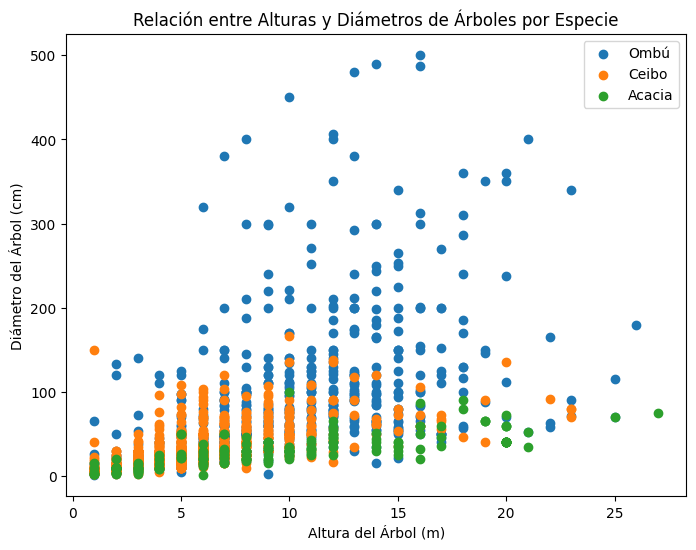

In [ ]:
# 1.
# Filtrar los datos por especies 'Ombú', 'Ceibo' y 'Acacia'
especies = ['Ombú', 'Ceibo', 'Acacia']                # Genero la lista de valores deseados
df_especies = df[df['nombre_com'].isin(especies)]     # Filtro el dataset original a los que tienen cualquiera de esas expresiones

# Gráfico de puntos de alturas vs diámetros para las especies seleccionadas
plt.figure(figsize=(8, 6))
# Loop para que cada especie quede graficada con un color distinto y darle el nombre en la leyenda
for especie in especies:
    df_especie = df_especies[df_especies['nombre_com'] == especie]
    plt.scatter(df_especie['altura_tot'], df_especie['diametro'], label=especie)

plt.xlabel('Altura del Árbol (m)')
plt.ylabel('Diámetro del Árbol (cm)')
plt.title('Relación entre Alturas y Diámetros de Árboles por Especie')
plt.legend()        #Toma los valores del 'label' en la línea de plt.scatter, opcional ponerle un título con title = "titulo_de_leyenda"
#plt.savefig('alturas_diametros_especies.pdf')  # 3. Guardar el gráfico en un archivo PDF
plt.show()

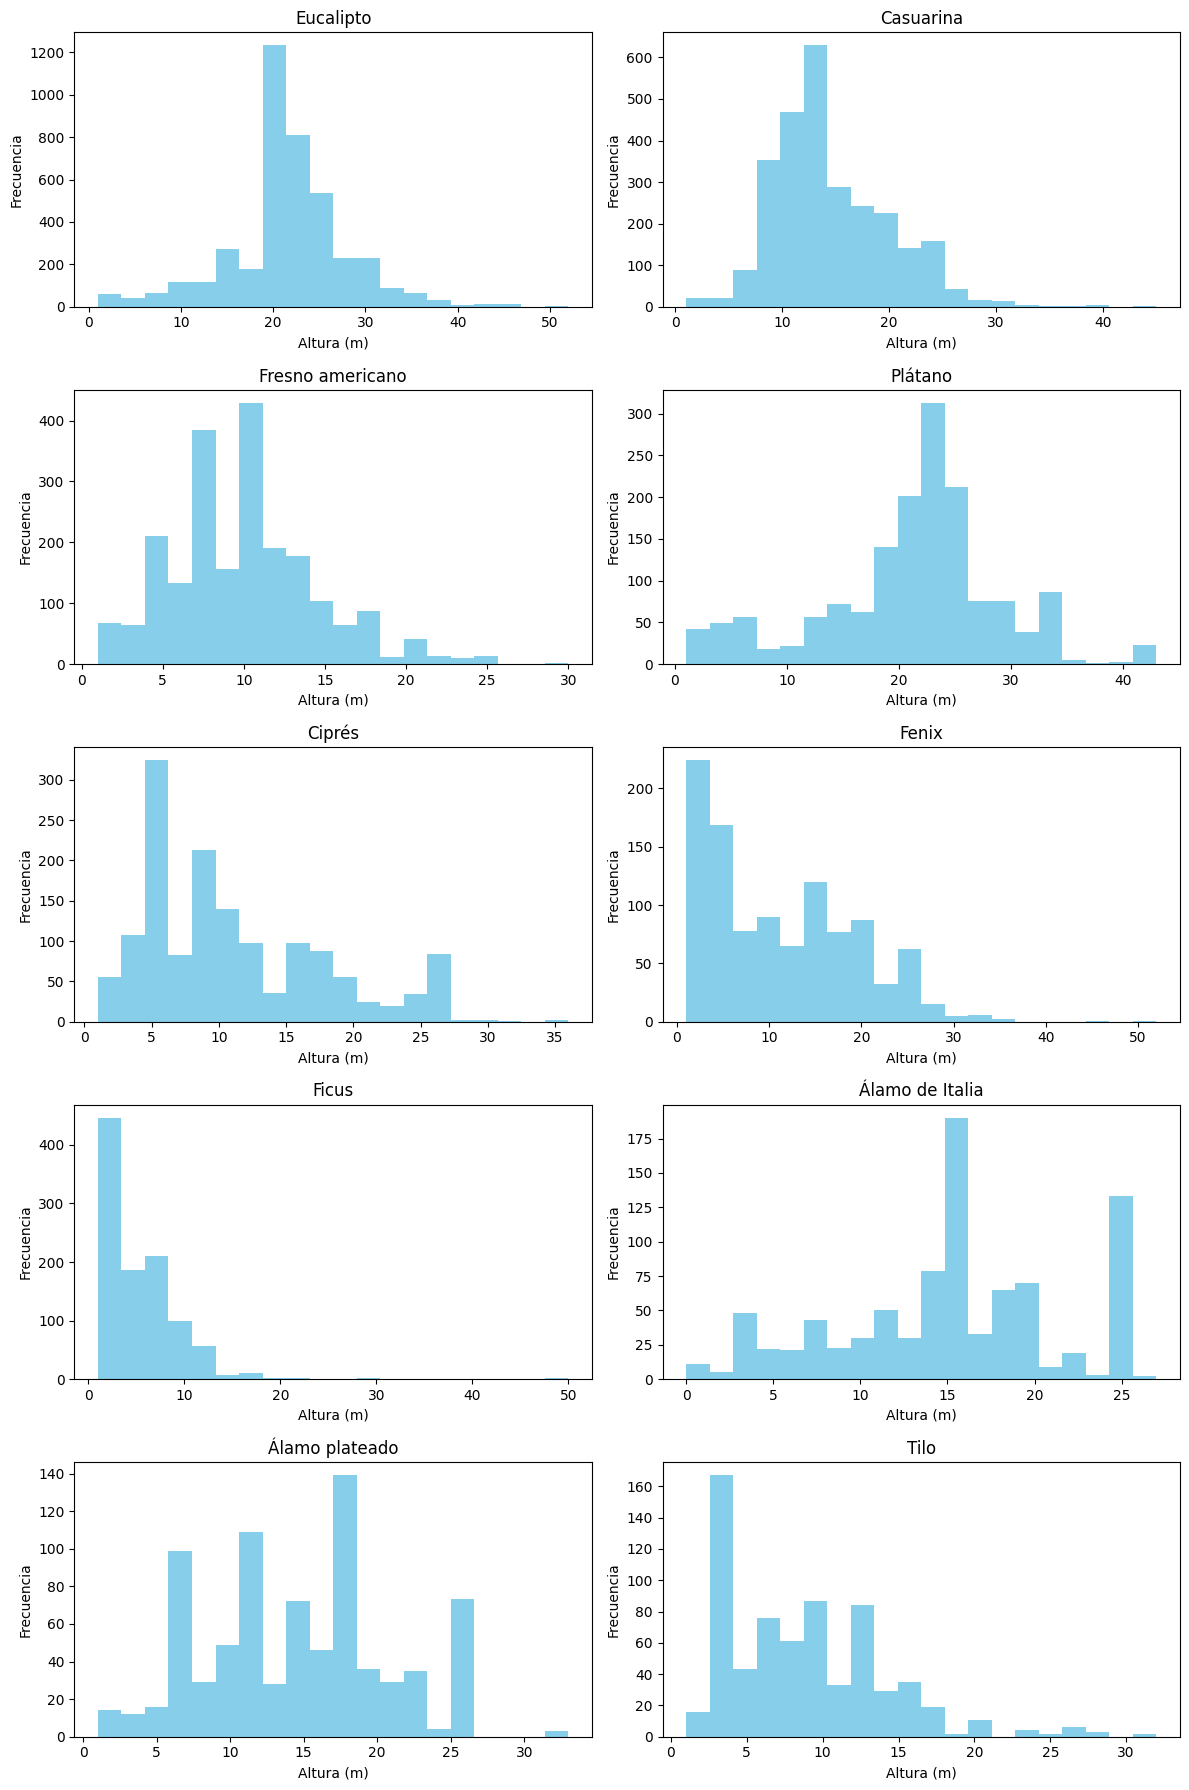

In [ ]:
# 2.
# Filtrar los datos por especies de origen exótico
especies_exoticas = df[df['origen'] == 'Exótico']

# Obtener las 10 especies con mayor número de ejemplares
# Prueben cada función de manera secuencial para ver el proceso:
#de los datos filtrados, se cuentan instancias de cada nombre_com, después nos quedamos con el top 10,
#se toma el índice de ese output que son los nombres, y se lo transdorma en lista (porque sino queda en formato Index del dataframe de Pandas)
especies_top10 = especies_exoticas['nombre_com'].value_counts().head(10).index.tolist()

# Crear subplots para cada especie
#Sabemos que son 10, por lo que la figura se define con 10 subplots (por ejemplo, 5 filas y 2 columnas)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 18))
axes = axes.flatten()

# Iterar sobre las especies y generar los gráficos en los subplots
for i, especie in enumerate(especies_top10):
    ax = axes[i]
    datos_especie = especies_exoticas[especies_exoticas['nombre_com'] == especie]
    ax.hist(datos_especie['altura_tot'], bins=20, color='skyblue')
    ax.set_title(especie)
    ax.set_xlabel('Altura (m)')
    ax.set_ylabel('Frecuencia')
  
# Ajustar espacio entre subplots y mostrar el gráfico
plt.tight_layout()
# plt.savefig('grafico_exoticas.jpg', dpi=300)   # 3. Guardar el gráfico en un archivo JPG
plt.show()

## Ejercicio 2:

Modificá el siguiente código para reproducir el gráfico que se muestra. Prestá atención a cómo se numeran los subplots.

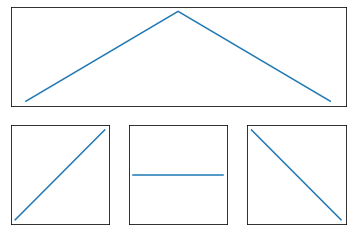

Código Original:

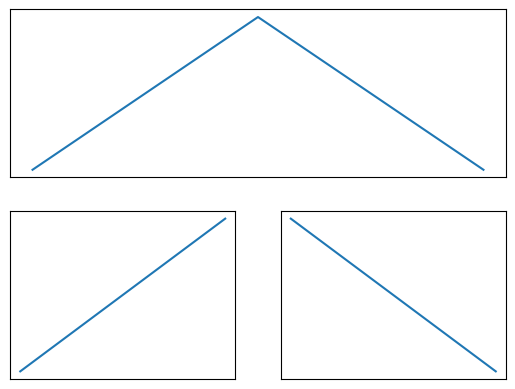

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2, 1, 1) # define la figura de arriba
plt.plot([0,1,2],[0,1,0]) # dibuja la curva 
plt.xticks([]), plt.yticks([]) # saca las marcas

plt.subplot(2, 2, 3) # define la primera de abajo, que sería la tercera si fuera una grilla regular de 2x2
plt.plot([0,1],[0,1])
plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4) # define la segunda de abajo, que sería la cuarta figura si fuera una grilla regular de 2x2
plt.plot([0,1],[1,0])
plt.xticks([]), plt.yticks([])

plt.show()

Código Modificado:

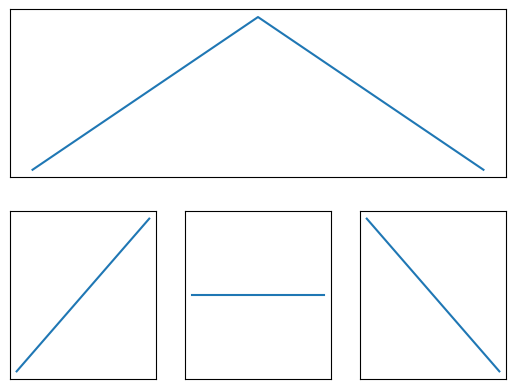

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2, 1, 1) # define la figura de arriba
plt.plot([0,1,2],[0,1,0]) # dibuja la curva pasando listas de coordenadas x e y (formando los puntos 0,0 - 1,1 - 2,0)
plt.xticks([]), plt.yticks([]) # saca las marcas pasando listas vacías

plt.subplot(2, 3, 4) # define la primera de abajo, que sería la cuarta si fuera una grilla regular de 3x3
plt.plot([0,1],[0,1])
plt.xticks([]), plt.yticks([])

# esta es la que agregamos
plt.subplot(2, 3, 5) # define la segunda de abajo, que sería la quinta si fuera una grilla regular de 3x3
plt.plot([0,1],[0.5,0.5])
plt.xticks([]), plt.yticks([])

plt.subplot(2, 3, 6) # define la tercera de abajo, que sería la sexta figura si fuera una grilla regular de 3x3
plt.plot([0,1],[1,0])
plt.xticks([]), plt.yticks([])

plt.show()

## Ejercicio 3

### Posiciones planetarias 

Las distancias de los planetas al Sol son: 

```
distancias = [0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48]
```

Estas son unidades relativas, la distancia Tierra-Sol es 1 (unidades astronómicas). 

Los periodos de sus órbitas (cuanto tardan en dar la vuelta al Sol, en años), son:

```
periodos = [0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09]
```

Por último, los nombres de los planetas correspondientes son: 

```
planetas = ["Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", 
            "Urano", "Neptuno", "Plutón"]
```

Consigna: 
 * Plotear los períodos vs las distancias de los planetas como puntos y en una escala doble logarítmica (log X, log Y)
 * Escribir el nombre del planeta cerca del punto correspondiente a ese planeta en el plot (puntos adicionales si el texto no se superpone y se lee claro, más puntos adicionales si usan flechas)
 * Trazar dos líneas punteadas (una vertical, una horizontal) que se crucen en el punto de la Tierra en el gráfico.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#Definición de variables a graficar, y los nombres de los planetas que usaremos para las anotaciones
distancias = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])
periodos   = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])
planetas   = ["Mercurio", "Venus", "Tierra", "Marte", "Jupiter", "Saturno", 
              "Urano", "Neptuno", "Plutón"]

fig, ax = plt.subplots()
ax.scatter(distancias, periodos, facecolor="olive", edgecolor="grey")
ax.set_xlabel("Distancias relativas a la tierra")
ax.set_ylabel("Periodos (años)")
ax.set_xscale("log")
ax.set_yscale("log")


# agrandamos un poco el rango del eje Y para hacer lugar al texto 
ax.set_ylim(0, 1000) 
# fijo el rango del eje x         EXTRA: podrían usar ax.get_xlim() para obtener el rango del eje x si no saben qué valor poner 'a ojo'
ax.set_xlim(0,50)

# lineas que se cruzan con eje en la tierra: uso los valores máximos de los ejes para que las líneas atraviesen todo el gráfico
ax.vlines(1, color="grey", ymin=0, ymax=1000, linestyle="dashed", alpha=0.5)
ax.hlines(1, color="grey", xmin=0, xmax=50, linestyle="dashed", alpha=0.5)

# hacemos un loop para agregar anotaciones
for i in range(len(planetas)):
  # movemos el texto un poco para que el texto no se superponga
  xtext = distancias[i] - (distancias[i] * 0.2) # lo corremos 20% a la izquierda
  ytext = periodos[i] + (periodos[i] * 1.2)     # lo corremos 120% hacia arriba
  # agregamos las anotaciones 
  ax.annotate(planetas[i], xy=(distancias[i], periodos[i]), xytext=(xtext,ytext),
              size=7, arrowprops=dict(shrink=0.05, width=3, headwidth=7, headlength=4, facecolor="tab:blue"))
  
  # anotaciones explicadas con comentarios 
  # ax.annotate(
  #  planetas[i],                     # <=== el texto
  #  xy=(distancias[i], periodos[i]), # <=== el punto que es el ancla/foco (las coordenadas de los puntos del scatter)
  #  xytext=(xt,yt),                  # <=== la posicion del texto
  #  size=7,                          # <=== tamaño del texto 
  #  arrowprops=dict(
  #    shrink=0.05,     # <=== achicamos la flecha esta fraccion de la longitud total (de ambos lados)
  #    width=3,         # <=== el ancho de la flecha (en puntos)
  #    headwidth=7,     # <=== el ancho de la cabeza de la flecha (en puntos)
  #    headlength=4,    # <=== la longitud de la cabeza de la flecha (en puntos)
  #    facecolor="") # retocamos la flecha con este diccionario de propiedades de flecha(arrowprops)
  #  )
  

## Ejercicio 4

### Clima

Bajar los datos de temperaturas globales promedio del aire, de este sitio: https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt

(los datos son de la NASA: https://data.giss.nasa.gov/gistemp/graphs/)

Hay 3 columnas con datos: el año, el cambio de temperatura (No-smoothing = *no suavizado*), y una representación suavizada del cambio de temperatura (Lowess).

Consigna:
 * Leer estos datos usando Pandas &ndash; ojo que no son csv, ni tsv, son de ancho fijo! Tip: ver [pd.read_fwf()](https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html)
 * Plotear la representación suavizada del cambio de temperatura como **una línea**
 * Plotear los datos de cambio de temperatura **como puntos**
 * Colorear los puntos en azul si son negativos (< 0) y rojos si son positivos (>=0).


In [ ]:
# usando pandas 

import pandas as pd

url = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-4/nasa-giss.txt'
# leemos el archivo directamente con pandas
# fwf = fixed-width format (columnas delimitadas por espaciamiento fijo)
df = pd.read_fwf(url, index_col=0, skiprows=8, header=None)   # index_col = 0 hace que tengamos dicha columna como índice
                                                              #skip_rows ignora ese número de filas antes de los datos
                                                              #header= None evita que use la primera fila de datos como nombres de las columnas

df.rename(columns={1: "Temperatura", 2: "Lowess"}, inplace=True) #renombro las columnas en la misma variable con inplace=True
#print(df.head(5))
#print(len(df.index))

#Generamos dos subconjuntos para luego plotearlos de distintos colores
# temperaturas positivas
pos = df[ df['Temperatura'] >= 0]
# temperaturas negativas
neg = df[ df['Temperatura'] < 0]

import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

# ploteamos como puntos las temperaturas no-suavizadas
# positivas en rojo
ax.scatter(pos.index, pos["Temperatura"], color="tab:red")
# negativas en azul 
ax.scatter(neg.index, neg["Temperatura"], color="tab:blue")

# ploteamos como linea las temperaturas suavizadas
ax.plot(df.index, df["Lowess"], color="black", linewidth=3)

# agregamos algunas etiquetas para decorar 
ax.set_xlabel("Años")
ax.set_ylabel("Cambio de Temperatura (°C)")